Pandas

Python library that provides high-performance, easy to use data structures and analysis tools

Setup

In [ ]:
import pandas as pd

Data Structures

Pandas contains the following useful Data Structures -

1. `Series` - 1-D Array, similar to a single Col in a spreadsheet (with Col name and Row labels).
2. `DataFrame` - Main Data Structure is the DataFrame, we can think of it as a 2-D table or a spreadsheet with Col names and Row labels.
3. `Panel` - Less used, it is like a dictionary of `DataFrames`.



---


Series

Creating a `Series`

In [ ]:
s = pd.Series([2, -1, 3, 5])
s

,0
0,2
1,-1
2,3
3,5


`Series` behave similarly to 1-D NumPy `ndarrays`, so we can pass them as parameters to NumPy functions.

In [ ]:
import numpy as np

np.exp(s)

,0
0,7.389056
1,0.367879
2,20.085537
3,148.413159


NumPy arithmetic and conditional operations on `Series` are also possible, they apply element-wise just like for `ndarray`

In [ ]:
s + [1000, 2000, 3000, 4000]

,0
0,1002
1,1999
2,3003
3,4005


In [ ]:
s < 0

,0
0,False
1,True
2,False
3,False


Similar to NumPy, if we add a number to a `Series`, that number is added to all the items in the `Series` (known as Broadcasting).

In [ ]:
s + 1000

,0
0,1002
1,999
2,1003
3,1005


Index Labels

Each item in a Series object has a unique identifier called the Index Label. By default, it is the position of the item in the Series (starting from 0). We can also set Index Labels manually.

In [ ]:
s2 = pd.Series([68, 83, 112, 68], index = ["alice", "bob", "charles", "darwin"])
s2

,0
alice,68
bob,83
charles,112
darwin,68


Thus, we can use the `Series` just like a `dict`.

In [ ]:
s2["bob"]

83

Using Dictionary

 We can also create a `Series` object from a `dict`, where the keys become Index Labels.

In [ ]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

,0
alice,68
bob,83
colin,86
darwin,68


`loc` and `iloc`

We can access an attribue by its label using `loc` or by its integer location using `iloc`

In [ ]:
s2.loc["bob"]

83

In [ ]:
s2.iloc[1]

83

Slicing `Series` also slices its Index Labels.

In [ ]:
s2.iloc[1:3]

,0
bob,83
charles,112


Automatic Alignment

When an operation involves multiple `Series, Pandas automatically aligns items by matching Index Labels.

In [ ]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


,0
alice,136.0
bob,166.0
charles,NaN
colin,NaN
darwin,136.0


The resulting `Series` contains union of Index Labels from `s2` and `s3`. Since `colin` is missing from `s2` and `charles` from `s3`, these items have a `NaN` result value (i.e., Not a Number, meaning its missing)

Using a Scalar

We can also initialize a `Series` using a Scalar and a list of Index Labels. All items will be set to the Scalar.

In [ ]:
meaning = pd.Series(42, ["life", "universe", "everything"])

`Series` Name

A `Series` can have a Name.

In [ ]:
s6 = pd.Series([83, 68], index = ["bob", "alice"], name = "weights")
s6

,weights
bob,83
alice,68




---


`DataFrame`

They represent a spreadsheet with cell values, Col names and Row Index Labels. We can see a `DataFrame` as a dictionary of `Series`.

Creating a `DataFrame`

We can pass a dictionary of `Series`.

In [ ]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}

people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


We can access multiple Col which can be returned as `Series` objects.

In [ ]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Using ndarray

Another way is to pass all the values as an ndarray and specify Col names and Row Index Labels separately.

In [ ]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]

d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Instead of an `ndarray`, we can also pass a `DataFrame` object.

In [ ]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3.0


Using Dictionary or List

Also possible to create a DataFrame with a dictionary (or list) of dictonaries (or list).

In [ ]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice": "Biking", "bob": "Dancing"},
    "weight": {"alice": 68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Multi-indexing

If all the Col are tuples of the same size, then they are understood as a Multi-index. Same goes for Row Index Labels.

In [ ]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"): 1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"): "Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"): 68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

We can now get a DataFrame containing all the `public` Cols.

In [ ]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

Dropping a Level

In above example, there are two Levels of Col and two Levels of indices, we can drop a Col level by calling `droplevel()`. The same goes for the indices.

In [ ]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

Transposing

We can swap Cols and indices using `T` attribute.

In [ ]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

Stacking and Unstacking Levels

`stack()` method will push the lowest Col level after the lowest index.

In [ ]:
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

In [ ]:
d7 = d6.stack()
d7

Paris London
birthyear alice       1985    NaN
          bob         1984    NaN
          charles      NaN   1992
hobby     alice     Biking    NaN
          bob      Dancing    NaN
weight    alice         68    NaN
          bob           83    NaN
          charles      NaN    112
children  bob          3.0    NaN
          charles      NaN    0.0

Note that many `NaN` values appeared. It is because many new combos did not exist before (there was no `bob` in `London`).

Calling `unstack()` will do the reverse, once again creating many `NaN` values.

In [ ]:
d8 = d7.unstack()
d8

Paris                  London             
            alice      bob charles  alice  bob charles
birthyear    1985     1984     NaN    NaN  NaN    1992
children      NaN      3.0     NaN    NaN  NaN     0.0
hobby      Biking  Dancing     NaN    NaN  NaN     NaN
weight         68       83     NaN    NaN  NaN     112

If we call `unstack()` again, we end up with a `Series` object.

In [ ]:
d9 = d8.unstack()
d9

Paris   alice    birthyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 children         3.0
                 hobby        Dancing
                 weight            83
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       1992
                 children         0.0
                 hobby            NaN
                 weight           112
dtype: object

Note that most methods in Pandas return a modified copy of the original object.



---


Accessing Rows

The `loc` attribute lets you access rows instead of Col. The result is a `Series` object in which the `DataFrame`'s Col names are mapped to Row Index Labels. We can also access Rows by interger location using `iloc`.

In [ ]:
people.loc["charles"]

,charles
birthyear,1992
hobby,NaN
weight,112
children,0.0


In [ ]:
people.iloc[2]

,charles
birthyear,1992
hobby,NaN
weight,112
children,0.0


We can also get a slice of Rows which returns a DataFrame object.

In [ ]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Finally, we can pass a Boolean Array to get matching rows.

In [ ]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


Adding and Removing Columns

We can treat DataFrame objects like a dictionary of Series.

In [ ]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Example of adding two Cols and removing one -

In [ ]:
people["age"] = 2018 - people["birthyear"] # Adds a new Col "age"
people["over 30"] = people["age"] > 30 # Adds another Col "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


Note that when we add new Col, it must have the same number of Rows. Missing Rows are filled with NaN, extra Rows are ignored.

In [ ]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1}) # Alice is missing, Eugene is ignored
people


,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


By default, new Col is added on the right. To add Col anywhere else we can use `insert()`.

In [ ]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


Assigning new Columns

We can also create new Col by using `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified.

In [ ]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


Evaluating an Expression

Pandas supports feature for Expression Evaluation using `numexpr` library (which must be installed).



In [ ]:
people.eval("weight / (height/100) ** 2 > 25")

,0
alice,False
bob,True
charles,True


Querying a `DataFrame`

The `query()` method lets you filter a `DataFrame` based on a Query expression -

In [ ]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets
bob,Dancing,181,83,34,True,0.0


Sorting a `DataFrame`

We can sort a DataFrame by calling its `sort_index`. By default it sorts the Rows by their Index Label, in ascending order.

In [ ]:
people.sort_index(ascending = False)

,hobby,height,weight,age,over 30,pets
charles,NaN,185,112,26,False,5.0
bob,Dancing,181,83,34,True,0.0
alice,Biking,172,68,33,True,NaN


Note that `sort_index` returns a sorted copy of the DataFrame. To modify the original directly, we can set the `inplace` argument to `True`. We can also sort the Cols instead of Rows by setting Axis = 1.

In [ ]:
people.sort_index(axis=1, inplace = True)
people

,age,height,hobby,over 30,pets,weight
alice,33,172,Biking,True,NaN,68
bob,34,181,Dancing,True,0.0,83
charles,26,185,NaN,False,5.0,112




---


Operations on `DataFrame`

Although `DataFrame` do not mimic NumPy Arrays, we can apply NumPy mathematical functions on `DataFrame`. They are applied to all values in it.

In [ ]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index = ["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [ ]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame` (Broadcasting).

In [ ]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Same is true for arithmetic and conditional operations.

Aggregation operations such as computing the `max()`, the `sum()` or the `mean` of a `DataFrame`, apply to each Col and return a `Series`.

In [ ]:
grades.mean()

,0
sep,7.75
oct,8.75
nov,7.50


In [ ]:
grades - grades.mean() # Equivalent to grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


Most of the functions take an optional Axis parameter. Note that while in 2-D NumPy `ndarray`, axis 0 is Rows and 1 is Col, in Pandas, Axis 0 is Col and Axis 1 is Rows.

Automatic Alignment

Similar to `Series`, when operating on multiple `DataFrame`, Pandas automatically aligns them by Row Index Label but also by Col names.

In [ ]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns = ["oct", "nov", "dec"], index = ["bob", "colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [ ]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


Handling Missing Data

Dealing with Missing Data is a frequent task when working wiht  real life data. Pandas offers a few tools to handle it.

We can replace all `NaN` values by using `fillna()` method.

In [ ]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


Another way to handle Missing Data is to interpolate, which by default interpolates the values vertically.

In [ ]:
bonus_points.interpolate(axis = 1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0




---


Matplotlib

Plotting a `DataFrame`

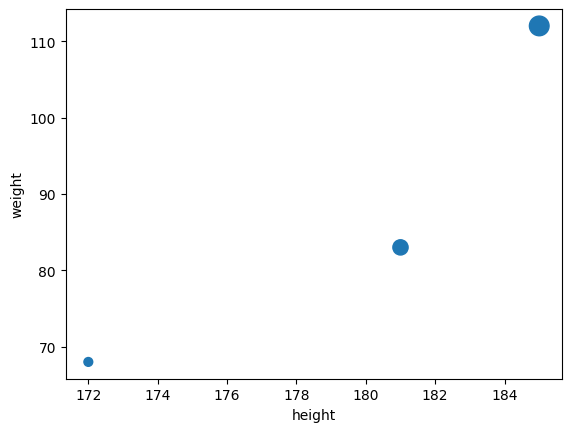

In [ ]:
import matplotlib.pyplot as plt

people.plot(kind = "scatter", x = "height", y = "weight", s =[40, 120, 200])
plt.show()